In [1]:
from model import build_transformer
from train import get_ds
from config import get_config
import torch
from metric import metric
import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/envs/pytorch-transformer/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config=get_config()
train_dataloader, val_dataloader, tokenizer_src, tokenizer_tgt = get_ds(config)

Max length of source sentence: 309
Max length of target sentence: 274


In [3]:
tokenizer_src.get_vocab_size()

15698

In [4]:
src_vocab_size=tokenizer_src.get_vocab_size()
tgt_vocab_size=tokenizer_tgt.get_vocab_size()
src_seq_len=config["seq_len"]
tgt_seq_len=config['seq_len']
d_model: int=512
N: int=6
h: int=8
dropout: float=0.1
d_ff: int=2048

model=build_transformer(src_vocab_size,tgt_vocab_size,src_seq_len,tgt_seq_len)

In [5]:
data=next(iter(train_dataloader))
encoder_input=data['encoder_input']
print(encoder_input.size())
encoder_mask=data['encoder_mask']

torch.Size([8, 350])


In [6]:
encoder_output=model.encode(encoder_input,encoder_mask)
encoder_output.size()

torch.Size([8, 350, 512])

In [7]:
# decoder_mask=data['decoder_mask']
# decoder_input=data['decoder_input']
# output=model.decode(encoder_output,encoder_mask,decoder_input,decoder_mask)

In [8]:
metric.metrics

[('InputEmbeddings', 0.004454851150512695, 1433600),
 ('PositionalEncoding', 0.005753517150878906, 1433600),
 ('LayerNormalization', 0.011666297912597656, 1433600),
 ('MultiHeadAttentionBlock', 0.119659423828125, 1433600),
 ('LayerNormalization', 0.013314485549926758, 1433600),
 ('FeedForwardBlock', 0.07917404174804688, 1433600),
 ('LayerNormalization', 0.013566732406616211, 1433600),
 ('MultiHeadAttentionBlock', 0.11573052406311035, 1433600),
 ('LayerNormalization', 0.009386777877807617, 1433600),
 ('FeedForwardBlock', 0.08246183395385742, 1433600),
 ('LayerNormalization', 0.013445138931274414, 1433600),
 ('MultiHeadAttentionBlock', 0.11414337158203125, 1433600),
 ('LayerNormalization', 0.009321212768554688, 1433600),
 ('FeedForwardBlock', 0.07817912101745605, 1433600),
 ('LayerNormalization', 0.013279199600219727, 1433600),
 ('MultiHeadAttentionBlock', 0.1114957332611084, 1433600),
 ('LayerNormalization', 0.009421586990356445, 1433600),
 ('FeedForwardBlock', 0.07822966575622559, 1433

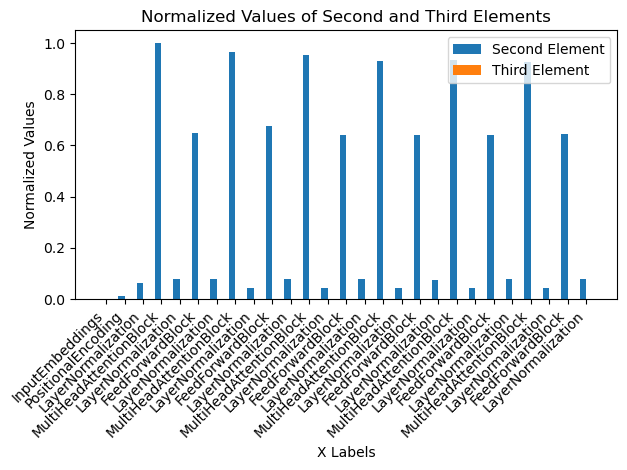

In [9]:
# Extract x labels and normalize the second and third elements
data=metric.metrics
x_labels = [item[0] for item in data]
normalized_second = [(item[1] - min(data, key=lambda x: x[1])[1]) / (max(data, key=lambda x: x[1])[1] - min(data, key=lambda x: x[1])[1]) for item in data]
# Check if all third elements are equal
all_third_equal = all(item[2] == data[0][2] for item in data)
if all_third_equal:
    normalized_third = [0] * len(data)
else:
    normalized_third = [(item[2] - min(data, key=lambda x: x[2])[2]) / (max(data, key=lambda x: x[2])[2] - min(data, key=lambda x: x[2])[2]) for item in data]


bar_width = 0.35
index = range(len(data))

fig, ax = plt.subplots()
bar1 = ax.bar(index, normalized_second, bar_width, label='Second Element')
bar2 = ax.bar([i + bar_width for i in index], normalized_third, bar_width, label='Third Element')

ax.set_xlabel('X Labels')
ax.set_ylabel('Normalized Values')
ax.set_title('Normalized Values of Second and Third Elements')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()